In [1]:
%matplotlib notebook
import pandas
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np

In [2]:
data_zephyr = pandas.read_csv('Commercial device.txt',delimiter='\t')
data_daq = pandas.read_csv('AlN.txt',delimiter='\t')

start_location = data_daq.loc[data_daq['time']==0].index[0]
data_daq_new = data_daq.iloc[start_location:,]

zephyr_data = data_zephyr['data'].tolist()
zephyr_time = data_zephyr['time'].tolist()
daq_data = data_daq_new['data'].tolist()
daq_time = data_daq_new['time'].tolist()

In [3]:
zephyr_fs = 25
daq_fs = 1000

In [4]:
zephyr_data = sig.detrend(zephyr_data)
# daq_data = sig.detrend(daq_data)

In [5]:
segment_start = 2400
segment_width = 1200


index_zephyr_start = zephyr_time.index(segment_start)
index_zephyr_end = zephyr_time.index(segment_start+segment_width)

zephyr_time_segment = zephyr_time[index_zephyr_start:index_zephyr_end]
zephyr_data_segment = zephyr_data[index_zephyr_start:index_zephyr_end]


index_daq_start = daq_time.index(segment_start)
index_daq_end = daq_time.index(segment_start+segment_width)

daq_time_segment = daq_time[index_daq_start:index_daq_end]
daq_data_segment = daq_data[index_daq_start:index_daq_end]

<IPython.core.display.Javascript object>


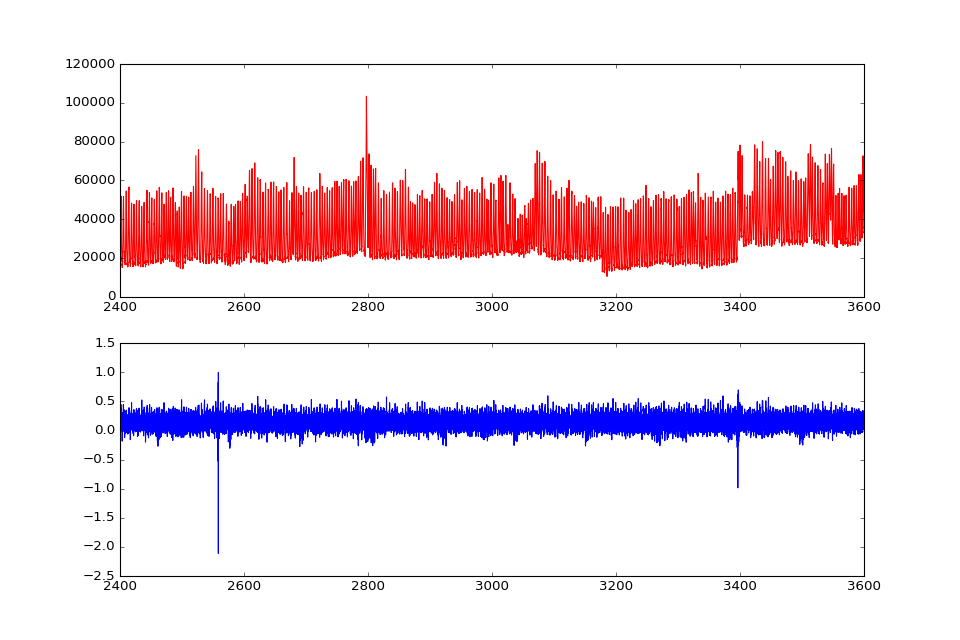

In [6]:
plt.figure(1,figsize=(12, 8))
ax1 = plt.subplot(2,1,1)
plt.plot(zephyr_time_segment, zephyr_data_segment,'r-')
ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.plot(daq_time_segment,daq_data_segment,'b-')
plt.show()

In [7]:
b, a = sig.butter(1, [0.00000001/(1000/2),0.5/(1000/2)], 'bandpass')
daq_data_filtered = sig.filtfilt(b, a, daq_data_segment)

<IPython.core.display.Javascript object>


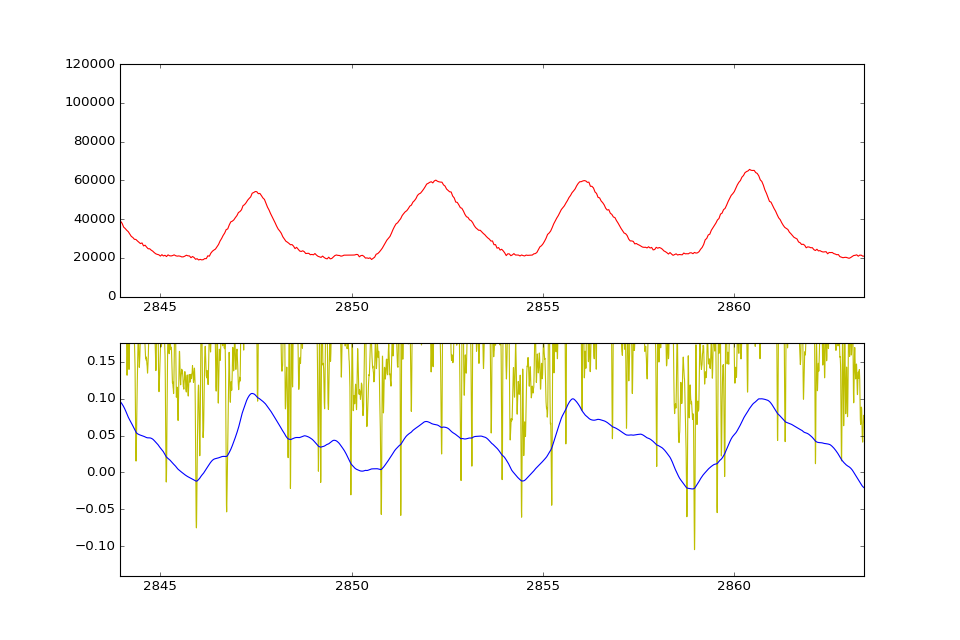

In [8]:
plt.figure(2,figsize=(12, 8))
ax1 = plt.subplot(2,1,1)
plt.plot(zephyr_time_segment, zephyr_data_segment,'r-')
ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.plot(daq_time_segment,daq_data_segment,'y-')
plt.plot(daq_time_segment,daq_data_filtered,'b-')

plt.show()

In [26]:
daq_data_envelope = sig.savgol_filter(daq_data_filtered,15,5)
# daq_data_envelope = np.gradient(daq_data_envelope)

<IPython.core.display.Javascript object>


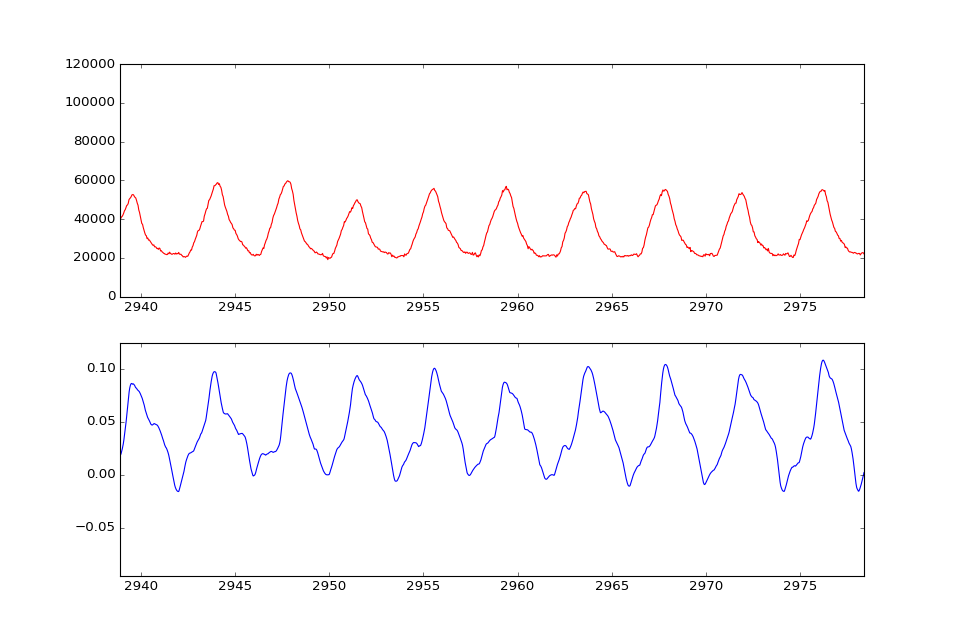

In [27]:
plt.figure(3,figsize=(12, 8))
ax1 = plt.subplot(2,1,1)
plt.plot(zephyr_time_segment, zephyr_data_segment,'r-')
ax2 = plt.subplot(2,1,2, sharex=ax1)
# plt.plot(daq_time_segment,daq_data_segment,'y-')
plt.plot(daq_time_segment,daq_data_envelope,'b-')

plt.show()

In [29]:
zephyr_peaks, _ = sig.find_peaks(zephyr_data_segment, distance = 8, prominence=5000)

zephyr_peaks_y = []
for i in range(0,len(zephyr_peaks)):
    zephyr_peaks_y.append(zephyr_data_segment[zephyr_peaks[i]])
zephyr_peaks_x = []
for i in range(0,len(zephyr_peaks)):
    zephyr_peaks_x.append(zephyr_time_segment[zephyr_peaks[i]])

In [30]:
daq_peaks, _ = sig.find_peaks(daq_data_envelope,distance=10,prominence = 0.03)

daq_peaks_y = []
for i in range(0,len(daq_peaks)):
    daq_peaks_y.append(daq_data_envelope[daq_peaks[i]])
daq_peaks_x = []
for i in range(0,len(daq_peaks)):
    daq_peaks_x.append(daq_time_segment[daq_peaks[i]])

In [31]:
plt.figure(4,figsize=(12, 8))
ax1 = plt.subplot(2,1,1)
plt.plot(zephyr_time_segment, zephyr_data_segment,'r-')
plt.plot(zephyr_peaks_x, zephyr_peaks_y, "gx",mew=2, ms=8)
ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.plot(daq_time_segment,daq_data_segment,'y-')
plt.plot(daq_time_segment,daq_data_envelope,'b-')
plt.plot(daq_peaks_x, daq_peaks_y, "gx",mew=2, ms=8)
plt.ylim([-0.5,0.5])
plt.show()

In [32]:
bb_intervals_zephyr = np.diff(zephyr_peaks_x)
bb_intervals_daq = np.diff(daq_peaks_x)

<IPython.core.display.Javascript object>


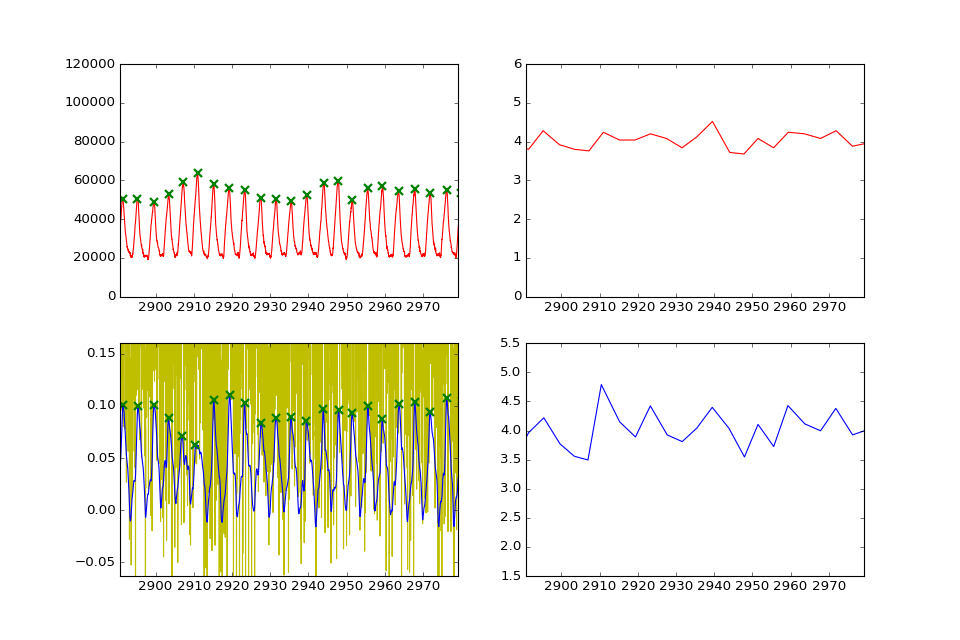

In [33]:
plt.figure(5,figsize=(12, 8))

ax1 = plt.subplot(2,2,2)
plt.plot(zephyr_peaks_x[0:len(bb_intervals_zephyr)],bb_intervals_zephyr,'r-')

ax2 = plt.subplot(2,2,1, sharex=ax1)
plt.plot(zephyr_time_segment, zephyr_data_segment,'r-')
plt.plot(zephyr_peaks_x, zephyr_peaks_y, "gx",mew=2, ms=8)

ax3 = plt.subplot(2,2,3,sharex=ax1)
plt.plot(daq_time_segment,daq_data_segment,'y-')
plt.plot(daq_time_segment,daq_data_envelope,'b-')
plt.plot(daq_peaks_x, daq_peaks_y, "gx",mew=2, ms=8)
plt.ylim([-0.4,0.4])
ax4 = plt.subplot(2,2,4, sharex=ax1)
plt.plot(daq_peaks_x[0:len(bb_intervals_daq)],bb_intervals_daq,'b-')
plt.show()